In [ ]:
"""
https://github.com/LaunchCoderGirlSTL/Data-Science-Assignments/blob/master/
course_material/week_12/2.1-a-first-look-at-a-neural-network.ipynb

Codes samples from Ch. 2, Sec. 1 of Deep Learning With Python
"""

In [3]:
#!pip install keras

import keras
keras.__version__
import pandas as pd

Using TensorFlow backend.


In [4]:
#!pip install tensorflow

<h3>This example of a neural network uses Keras, a Python library, to learn to classify hand-written digits.</h3>

The problem at hand is the classification of grayscale images of handwritten digits into 10 categories.
We will be using the MNIST dataset, which is a classic dataset in the ML community. It is a set of 60,000 training images & 10,000 test images, assembled by the National Institute of Standards and Technology in the 80's.
The MNIST dataset comes preloaded in Keras in the form of a set of four Numpy arrays.

In [5]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Populating the interactive namespace from numpy and matplotlib


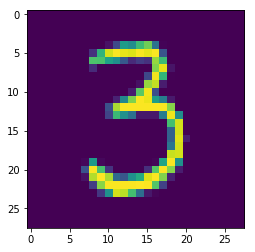

Label --> 3


In [12]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy

i = 50  # some arbitrary component in the dataset
img = train_images[i]
imgplot = plt.imshow(img)
plt.show()
print('Label -->', train_labels[i])

<h3>Now that we have imported and explored our dataset a bit, we can begin building a neural network on Keras.</h3>

Our workflow will be:
 1. Present our neural network with the training data, <code>train_images</code> and <code>train_label</code>
 2. The network will learn to associate images and labels
 3. We'll ask the network to produce predictions for </code>test_images</code>, and we'll verify if these predictions match the labels from <code>test_labels</code>

In [13]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
#network.add(layers.Dense(256, activation='relu', input_shape=(512,)))
network.add(layers.Dense(10, activation='softmax'))

**The core building block of neural networks is the "layer".**
Layers are data-processing modules that can be thought of as filters for data. Specifically, layers extract representations out of the data that is fed into them.

Most of deep learning consists of chaining together simple layers which will implement a form of progressive "data distillation".

In this example, our network consists of a sequence of two "dense" layers, which are fully-connected neural layers. The second layer is a 10-way "softmax" layer, which means it returns an array of 10 probability scores. *Each score will be the probability that the current digit image belongs to one of our 10 digit classes.*

To prepare our network for training, we need to compile three more things:
1. **A loss function**
   <p>This is how the network will be able to measure how well it is going on the training data</p>
2. **An optimizer**
    <p>This is the mechanism through which the network will update itself based on the data and its loss function</p>
3. **Metrics**
    <p>This will help monitor things during training and testing; we will only focus on accuracy here</p>

In [14]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Before training, we needs to preprocess our data to shape and scale it. We will transform it into a <code>float32</code> array of shape (60000, 28 * 28) with values between 0 and 1.

In [15]:
train_images_rsh = train_images.reshape((60000, 28* 28))
train_images_rsh = train_images_rsh.astype('float32') / 255

test_images_rsh = test_images.reshape((10000, 28* 28))
test_images_rsh = test_images_rsh.astype('float32') / 255

We need to categorically encode the labels now:

In [16]:
from keras.utils import to_categorical

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [17]:
history = network.fit(train_images_rsh, train_labels_cat,  # training input features & their labels
                     validation_data = (test_images_rsh, test_labels_cat), # this line is optional
                     # it is telling the model to evaluate the model as it is trained
                     epochs=20, batch_size=128)  # setting the hyperparameters of the nn

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.2591 - accuracy: 0.9251 - val_loss: 0.1303 - val_accuracy: 0.9615
Epoch 2/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.1040 - accuracy: 0.9689 - val_loss: 0.0980 - val_accuracy: 0.9693
Epoch 3/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0686 - accuracy: 0.9796 - val_loss: 0.0755 - val_accuracy: 0.9771
Epoch 4/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0496 - accuracy: 0.9852 - val_loss: 0.0774 - val_accuracy: 0.9766
Epoch 5/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0380 - accuracy: 0.9888 - val_loss: 0.0729 - val_accuracy: 0.9792
Epoch 6/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0283 - accuracy: 0.9919 - val_loss: 0.0714 - val_accuracy: 0.9782
Epoch 7/20
60000/60000 [==============================] - 8s 1

Now let's check that our model performs well on the test set, too:

In [18]:
test_loss, test_acc = network.evaluate(test_images_rsh, test_labels_cat)

10000/10000 [==============================] - 1s 54us/step


In [20]:
print('Test Accuracy: ', test_acc * 100)

Test Accuracy:  98.22999835014343


The test accuracy turns out to be quite a bit lower than the training accuracy (99.98%). This leads us to believe that our model was overfit to our training data.

<h3>Monitoring Model Performance During Training</h3>

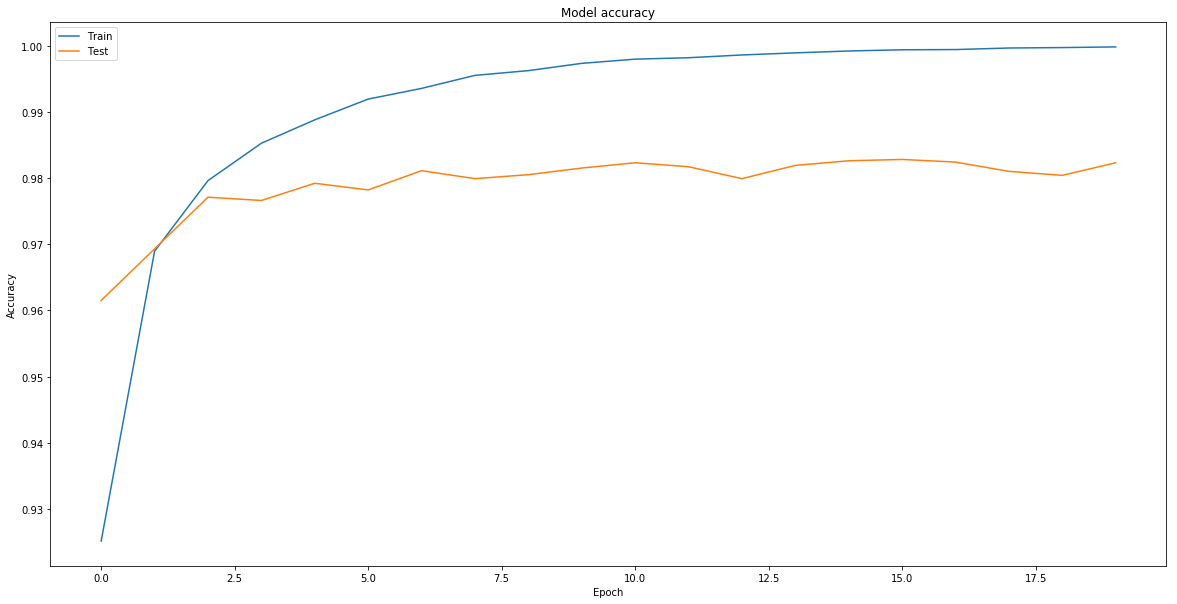

In [21]:
# Plot training & validation accuracy values
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

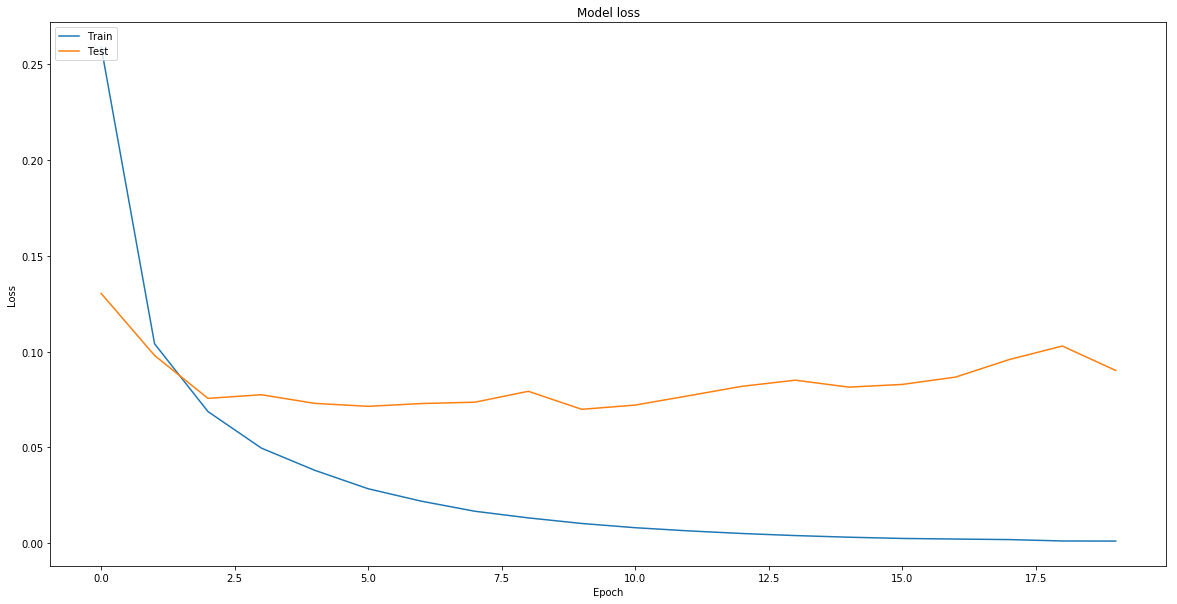

In [22]:
# Plot training & validation accuracy values
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Populating the interactive namespace from numpy and matplotlib


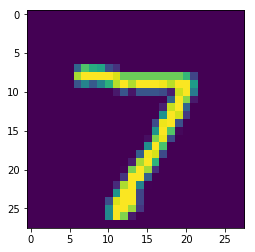

(28, 28)


In [23]:
# A single image from the test set
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = test_images[0]
imgplot = plt.imshow(img)
plt.show()
print(img.shape)

<h3>Now we'll look at an imported image.</h3>

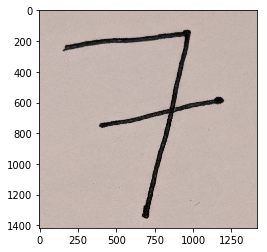

In [34]:
from PIL import Image
img_file = 'seven.jpg'
img = Image.open(img_file)
plt.imshow(img)

In [35]:
# Open in RGB mode and resize to 28 * 28
im = Image.open(img_file)
newsize = (28, 28)
im1 = im.resize(newsize)

# Separate color channels [RGB]
red, green, blue = im1.split()

# Shows the image in image viewer
img_resize_file = 'seven.jpg'
red.save(img_resize_file)
red

In [36]:
# Read re-sized image and look at it

import matplotlib.image as img
image_rsh = img.imread(img_resize_file)
print(image_rsh.shape)

(28, 28)


In [37]:
# Reshape for Neural Net
image_rsh = image_rsh.reshape(28*28)
image_rsh = image_rsh.astype('float32') / 255
image_rsh.shape

(784,)

In [38]:
# Convert to its complement 
image_rsh = 1-image_rsh
image_rsh[0:20]

array([0.2588235 , 0.2235294 , 0.23137254, 0.22745097, 0.20784312,
       0.2235294 , 0.23137254, 0.21568626, 0.20392156, 0.26274508,
       0.25098038, 0.16862744, 0.16862744, 0.25098038, 0.27058822,
       0.21960783, 0.20392156, 0.24313724, 0.25490195, 0.24313724],
      dtype=float32)

In [39]:
# Put it into an array
image_rsh_arr = array([image_rsh], dtype=float32)

In [40]:
# Look at the Predicted Value
network.predict_classes(image_rsh_arr)

array([2], dtype=int64)

In [41]:
# Look at the propabilities
network.predict(image_rsh_arr)

array([[9.9726455e-27, 2.0594371e-30, 9.9992907e-01, 8.6545843e-17,
        0.0000000e+00, 2.2505631e-10, 7.0971473e-05, 8.8797069e-12,
        1.8344383e-27, 1.1529939e-23]], dtype=float32)